# Tutorial: Train your first model

In [ ]:
#!pip install sklearn

# 1) MNIST 데이터 검색

Notebook 셀에서 다음 코드를 실행하여 MNIST 데이터 세트를 검색하고 로컬 data 폴더에 저장합니다.

In [2]:
import os
import urllib.request

#create a folder for the dataset
os.makedirs('./data', exist_ok = True)

# load dataset to the directory--as you can see, you must load train sets and test sets separately
#urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', filename='./data/train-images.gz')
#urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', filename='./data/train-labels.gz')
#urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', filename='./data/test-images.gz')
#urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', filename='./data/test-labels.gz')

('./data/test-labels.gz', <http.client.HTTPMessage object at 0x00000247D0FE6080>)과 비슷한 출력이 표시됩니다.  
data 폴더가 만들어지고, 이 폴더 안에는 이미지와 레이블 테스트 및 학습 데이터가 포함된 Gzip 압축 파일 4개가 있습니다

# 2)데이터 세트 분할

그 다음 단계로 데이터를 학습 및 테스트 세트로 분할합니다. 압축된 파일을 로드하고 처리 가능한 numpy 배열을 반환하는 함수가 필요합니다

In [3]:
import gzip
import numpy as np
import struct

# load compressed MNIST gz files and return numpy arrays
def load_data(filename, label=False):
    with gzip.open(filename) as gz:
        struct.unpack('I', gz.read(4))
        n_items = struct.unpack('>I', gz.read(4))
        if not label:
            n_rows = struct.unpack('>I', gz.read(4))[0]
            n_cols = struct.unpack('>I', gz.read(4))[0]
            res = np.frombuffer(gz.read(n_items[0] * n_rows * n_cols), dtype=np.uint8)
            res = res.reshape(n_items[0], n_rows * n_cols)
        else:
            res = np.frombuffer(gz.read(n_items[0]), dtype=np.uint8)
            res = res.reshape(n_items[0], 1)
    return res

print('Functions defined')

Functions defined


load_data 도우미 함수를 정의한 후 아래 코드를 사용하여 데이터를 로드하는 데 사용할 수 있습니다.

In [4]:
# To help the model converge faster, shrink the intensity values (X) from 0-255 to 0-1

X_train = load_data('./data/train-images.gz', False) / 255.0
y_train = load_data('./data/train-labels.gz', True).reshape(-1)

X_test = load_data('./data/test-images.gz', False) / 255.0
y_test = load_data('./data/test-labels.gz', True).reshape(-1)

print('Data loaded')

Data loaded


# 3) 샘플 이미지 표시

데이터를 로드했는지 확인하기 위해 matplotlib를 사용하여 샘플 이미지 + 레이블 중 하나를 표시해 보겠습니다.   
실행하는 데 1~2분 정도 소요됩니다.

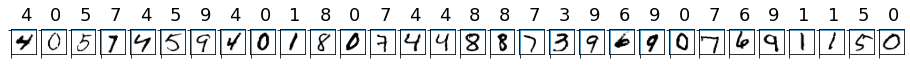

Done


In [5]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np


count = 0
sample_size = 30
plt.figure(figsize = (16, 6))
for i in np.random.permutation(X_train.shape[0])[:sample_size]:
    count = count + 1
    plt.subplot(1, sample_size, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x=10, y=-10, s=y_train[i], fontsize=18)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys)
    
plt.show()

print('Done')

# 4) Scikit-Learn로 로지스틱 회귀 모델 실행

로지스틱 회귀 알고리즘은 응답 변수가 범주형일 때 사용되는 회귀 모델입니다. 학습 목표를 달성하기 위해, 일반적으로 사용되는 Scikit-learn 패키지를 가져와서 알고리즘을 구현합니다.   

다음 코드를 사용하여 로지스틱 회귀 모델을 실행하고 모델의 정확도를 인쇄합니다. 이 작업을 완료하는 데 몇 분 정도 걸릴 수 있습니다.

In [6]:
from sklearn.linear_model import LogisticRegression

#load the model
clf = LogisticRegression()
#fit the model
clf.fit(X_train, y_train)

#evaluate the model by using a test set
y_hat = clf.predict(X_test)
#print the accuracy
print(np.average(y_hat == y_test))

print('Done')

0.9258
Done


/anaconda/envs/py38_default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 5) 학습모델 활용

pickle로 학습된 모델을 저장하고, 테스트

In [7]:
import pickle
#from sklearn.externals import joblib
import joblib

In [8]:
os.makedirs('outputs', exist_ok=True)
joblib.dump(value=clf, filename='outputs/sklearn_lf.pkl') 

['outputs/sklearn_lf.pkl']

In [10]:
clf_from_joblib = joblib.load('outputs/sklearn_lf.pkl') 
y_hat2=clf_from_joblib.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_hat2)
print(conf_mx)
print('Overall accuracy:', np.average(y_hat2 == y_test))

[[ 959    0    0    3    1    7    5    4    1    0]
 [   0 1111    4    2    0    2    3    2   11    0]
 [   6    9  926   16    9    4   13    6   39    4]
 [   4    1   18  917    1   22    4   11   25    7]
 [   1    1    7    3  914    0   10    4   10   32]
 [  10    2    3   34    7  783   14    6   29    4]
 [   9    3    8    2    7   14  912    2    1    0]
 [   1    8   24    5    7    1    0  950    3   29]
 [   9   11    8   23    7   25   12    7  861   11]
 [   9    8    0   11   24    6    0   19    7  925]]
Overall accuracy: 0.9258


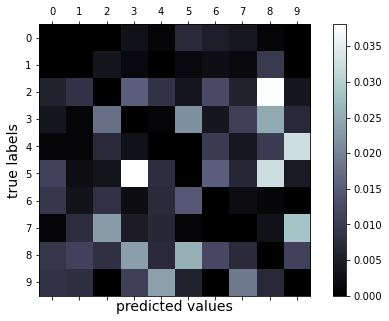

In [12]:
# normalize the diagonal cells so that they don't overpower the rest of the cells when visualized
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
cax = ax.matshow(norm_conf_mx, cmap=plt.cm.bone)
ticks = np.arange(0, 10, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks)
ax.set_yticklabels(ticks)
fig.colorbar(cax)
plt.ylabel('true labels', fontsize=14)
plt.xlabel('predicted values', fontsize=14)
plt.savefig('conf.png')
plt.show()